In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer
import numpy as np
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
data['target']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
273    0
274    0
275    0
276    0
277    0
278    0
279    0
280    0
281    0
282    0
283    0
284    0
285    0
286    0
287    0
288    0
289    0
290    0
291    0
292    0
293    0
294    0
295    0
296    0
297    0
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [5]:
def get_missing_info(data):
    data_missing = data.isna()
    data_num_missing = data_missing.sum()
    print(data_num_missing / len(data) * 100)
    
def nan_replase(df, column_name, strategy):
    '''
    "most_frequent"
    "mean"
    '''
    imp=Imputer(missing_values=np.nan, strategy=strategy)
    imp.fit(df[[column_name]])
    df[column_name]=imp.transform(df[[column_name]]).ravel()
    return df

get_missing_info(data)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


In [6]:
data = nan_replase(data, 'exang', "most_frequent")
data = nan_replase(data, 'slope', "most_frequent") # restecg 
data = nan_replase(data, 'fbs', "most_frequent")
data = nan_replase(data, 'restecg', "most_frequent")
data = nan_replase(data, 'ca', "most_frequent")
data = nan_replase(data, 'thal', "most_frequent")
##################################################
data = nan_replase(data, 'trestbps', "mean")
data = nan_replase(data, 'oldpeak', "mean")
data = nan_replase(data, 'thalach', "mean")
data = nan_replase(data, 'chol', "mean")




for name in data.columns:
    if name != 'target':
        data[name] = (data[name]-data[name].min())/(data[name].max()-data[name].min())


C:\Users\Andriy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Andriy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Andriy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Andriy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is depr

In [7]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1
5,0.583333,1.0,0.000000,0.433962,0.150685,0.0,0.5,0.587786,0.0,0.064516,0.5,0.00,0.333333,1
6,0.562500,0.0,0.333333,0.433962,0.383562,0.0,0.0,0.625954,0.0,0.209677,0.5,0.00,0.666667,1
7,0.312500,1.0,0.333333,0.245283,0.312785,0.0,0.5,0.778626,0.0,0.000000,1.0,0.00,1.000000,1
8,0.479167,1.0,0.666667,0.735849,0.166667,1.0,0.5,0.694656,0.0,0.080645,1.0,0.00,1.000000,1
9,0.583333,1.0,0.666667,0.528302,0.095890,0.0,0.5,0.786260,0.0,0.258065,1.0,0.00,0.666667,1


In [8]:
get_missing_info(data)   

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


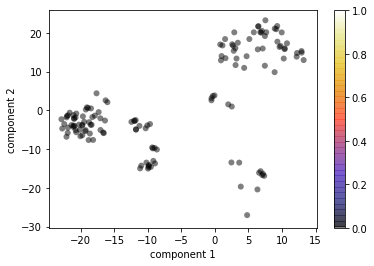

In [9]:
projected = TSNE(n_components=2).fit_transform(data.loc[:, data.columns != 'target'])

plt.scatter(projected[:, 0], projected[:, 1],
            c=data.target, edgecolor='none', alpha=0.5, cmap="CMRmap")
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

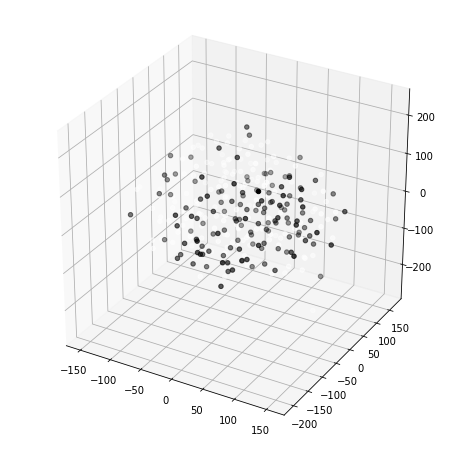

In [10]:
projected3 = TSNE(n_components=3).fit_transform(data.loc[:, data.columns != 'target'])
fig = plt.figure(figsize=(8, 8))  
ax = plt.axes(projection='3d')
projected = TSNE(n_components=3).fit_transform(data.loc[:, data.columns != 'target'])
ax.scatter3D(projected3[:, 0], projected3[:, 1],projected3[:, 2], c=data.target, cmap="CMRmap");

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', 1), data['target'], test_size = .2, random_state=10) #split the data

In [12]:
## We shuld use tree
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

n_estimators = 100


plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators),RandomForestClassifier(max_depth=5)]



def model_fit(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_predict_test = model.predict(X_test)
    #y_predict_train = model.predict(X_train)

    cm = confusion_matrix(y_test, y_predict_test)
    #sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    #specificity = cm[1,1]/(cm[1,1]+cm[0,1])
    
    
    print("#####################################################################################")
    #print('Specificity : ', specificity)
    #print('Sensitivity : ', sensitivity)
    print("Accuracy score : ",accuracy_score(y_test, y_predict_test))
    print("#####################################################################################")
    return model, cm

for model in models:
    print("Model report")
    model_fit(model, X_train, X_test, y_train, y_test)

Model report
#####################################################################################
Accuracy score :  0.7540983606557377
#####################################################################################
Model report
#####################################################################################
Accuracy score :  0.8032786885245902
#####################################################################################
Model report
#####################################################################################
Accuracy score :  0.8524590163934426
#####################################################################################
Model report
#####################################################################################
Accuracy score :  0.819672131147541
#####################################################################################
Model report
#####################################################################################
Accuracy score

C:\Users\Andriy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
model, cm = model_fit(AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators), X_train, X_test, y_train, y_test)

#####################################################################################
Accuracy score :  0.8360655737704918
#####################################################################################


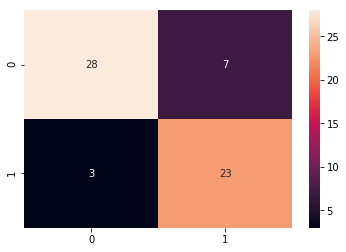

In [14]:
sns.heatmap(cm,annot=True)
plt.show()

In [15]:
model, cm = model_fit(AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators), X_train, X_test, y_train, y_test)

#####################################################################################
Accuracy score :  0.8032786885245902
#####################################################################################


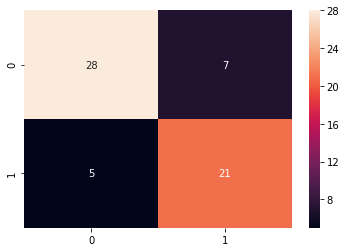

In [16]:

sns.heatmap(cm,annot=True)
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC

param = [
    {
        "kernel": ["linear"],           
        "C": [1, 10, 100, 1000]
    },
    {
        "kernel": ["rbf"],
        "C": [1, 10, 100, 1000],
        "gamma": [1e-2, 1e-3, 1e-4, 1e-5]
    }
]
 

svm = SVC(probability=True)
model = GridSearchCV(svm, param,
        cv=10, n_jobs=4, verbose=3)

model_fit(model, X_train, X_test, y_train, y_test)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    4.2s


#####################################################################################
Accuracy score :  0.7704918032786885
#####################################################################################


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    7.6s finished
C:\Users\Andriy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(GridSearchCV(cv=10, error_score='raise-deprecating',
        estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, probability=True, random_state=None,
   shrinking=True, tol=0.001, verbose=False),
        fit_params=None, iid='warn', n_jobs=4,
        param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 1e-05]}],
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring=None, verbose=3), array([[24, 11],
        [ 3, 23]], dtype=int64))

#####################################################################################
Accuracy score :  0.7704918032786885
#####################################################################################


C:\Users\Andriy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


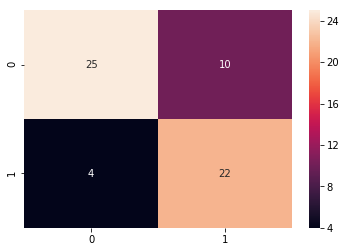

In [18]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,170,190,200]}
model = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
model, cm = model_fit(model, X_train, X_test, y_train, y_test)

sns.heatmap(cm,annot=True)
plt.show()

In [19]:
## Best of classic AdaBoostClassifier

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes=None)
y_test = to_categorical(y_test, num_classes=None)
print (y_train.shape)
print (y_train[:10])



def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Using TensorFlow backend.


(242, 2)
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=200, batch_size=10, verbose = 10)

Instructions for updating:
Use tf.cast instead.
Train on 242 samples, validate on 61 samples
Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 

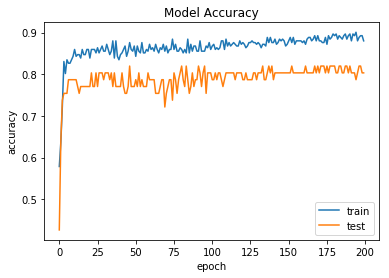

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

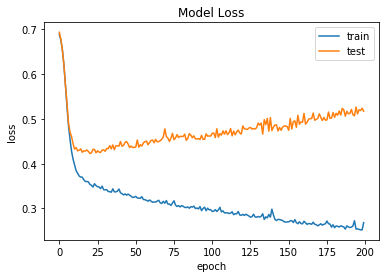

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()